# Use-case 1: Encoding hierarchical layers. Example: CORINE land use/land cover

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

#
# We need to adjust the path since we are in the sub-folder "example"
# and import the python module from a relative path, not the installed
# version.
#
import sys
sys.path.append("..")

CORINE is a pan-european layer for land use and land cover classes with three hierarchies. Here, only Austria is considered.

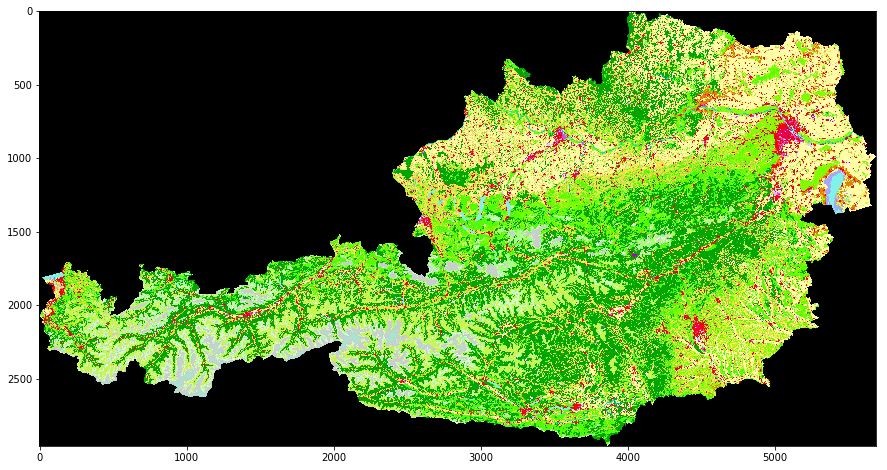

In [2]:
image = mpimg.imread("../../data/CORINE/austria_corine_rgb.jpg")
plt.figure(figsize=(15,10))
plt.imshow(image)
plt.show()

## Encoding CORINE hierarchial land use/land cover classes using pythemap

Data import and preparation

In [1]:
#
# Import numpy and pythemap geo functions
#
import numpy
from pythemap import geo

#
# Generate a new raster layer
#
r = geo.Raster()

#
# Generate a new legend. In pythemap, the data is not necessarily
# human-readable and the legend is required to be able to traverse
# to the datums and extract the values.
#
legend = geo.Legend()

#
# This is how the legend is encoded, the legend type is "hierarcy"
#
root =  {
        "metadata":{
            "type":"hierarchy"
        },
        "items": {
            "Artificial surfaces":{
                "Urban fabric":{
                    "Continuous urban fabric":{},
                    "Discontinuous urban fabric ":{}
                },
                "Industrial, commercial and transport units":{
                    "Industrial or commercial units ":{},
                    "Road and rail networks and associated land":{},
                    "Port areas":{},
                    "Airports":{}
                },
                "Mine, dump and construction sites":{
                    "Dump sites":{},
                    "Construction sites":{},
                    "Mineral extraction sites":{}
                },
                "Artificial, non-agricultural vegetated areas":{
                    "Green urban areas":{},
                    "Sport and leisure facilities":{}
                }
            },
            "Argicultural areas":{
                "Arable land":{
                    "Non-irrigated arable land":{},
                    "Permanently irrigated land":{},
                    "Rice fields":{},
                },
                "Permanent crops":{
                    "Vineyard":{},
                    "Fruit trees and berry plantations":{},
                    "Olive groves":{},
                },
                "Pastures":{
                    "Pastures":{}
                },
                "Heterogeneous agricultural areas":{
                    "Annual crops associated with permanent crops":{},
                    "Complex cultivation patterns ":{},
                    "Land principally occupied by agriculture, with significant areas of natural vegetation":{},
                    "Agro-forestry areas":{},
                }
            },
            "Forest and semi-natural areas":{
                "Forests":{
                    "Broad-leaved forest":{},
                    "Coniferous forest":{},
                    "Mixed forest":{},
                },
                "Scrub and/or herbaceous vegetation associations":{
                    "Natural grasslands":{},
                    "Moors and heathland":{},
                    "Sclerophyllous vegetation":{},
                    "Transitional woodland-shrub":{},
                },
                "Open spaces with little or no vegetation":{
                    "Beaches, dunes, sands":{},
                    "Bare rocks":{},
                    "Sparsely vegetated areas":{},
                    "Burnt areas":{},
                    "Glaciers and perpetual snow":{},
                },
            },
            "Wetlands":{
                "Inland wetlands":{
                    "Inland marshes":{},
                    "Peat bogs":{},
                },
                "Maritime wetlands":{
                    "Salt marshes":{},
                    "Salines":{},
                    "Intertidal flats":{},
                },
            },
            "Water bodies":{
                "Inland waters":{
                    "Water courses":{},
                    "Water bodies":{},
                },
                "Marine waters":{
                    "Coastal lagoons":{},
                    "Estuaries":{},
                    "Sea and ocean":{},
                },
            }
        }
    }

#
# Add the json to the layer class. It will be remembered and used in future
# to encode/decode/mask the data
#
legend.put(root)

#
# The non-encoded CORINE land use / land cover was pre-processed
# and can be imported here as numpy array.
#
#a = numpy.load("../data/corine/austria_nd.npy")
a = numpy.load("D:\\austria_nd.npy")

With the "encode" commad the three hierarchies can be encoded and compressed into one layer

In [2]:
encoded = r.encode(a, legend, False)

In [5]:
#
# Delete original array as it takes too much space and is not necessary any more
#
a = None

Once the data is encoded, we can create masks very easily

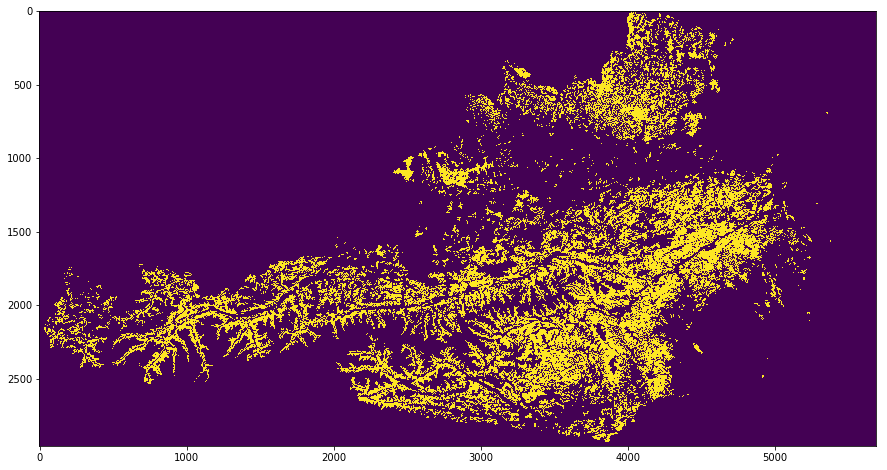

In [6]:
mask = r.mask("Coniferous forest", encoded, legend)
plt.figure(figsize=(15,10))
plt.imshow(mask)
plt.show()

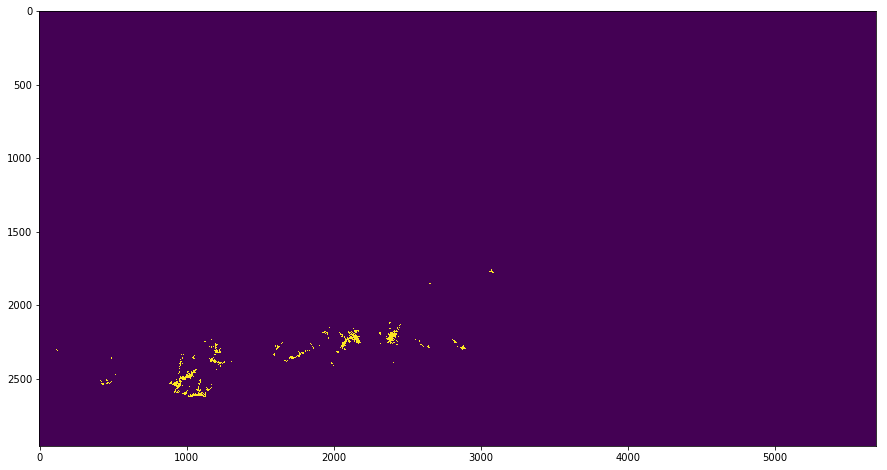

In [16]:
mask = r.mask("Glaciers and perpetual snow", encoded, legend)
plt.figure(figsize=(15,10))
plt.imshow(mask)
plt.show()

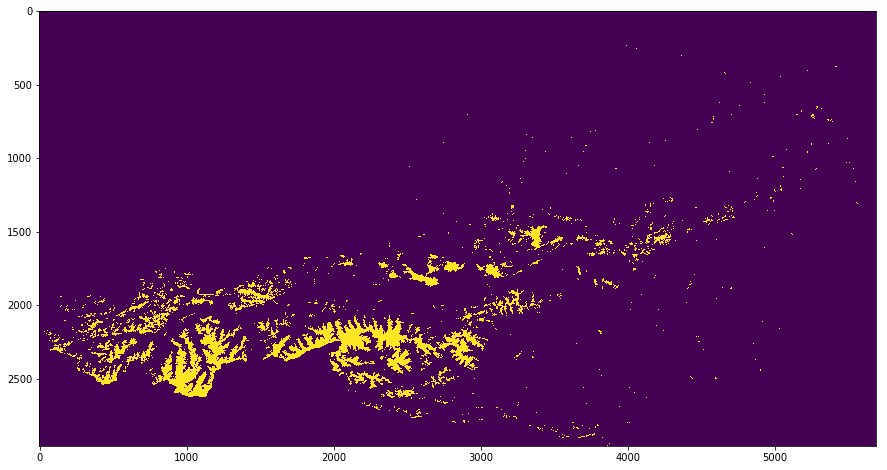

In [24]:
mask = r.mask(["Open spaces with little or no vegetation","Mineral extraction sites"], encoded, legend)
plt.figure(figsize=(15,10))
plt.imshow(mask)
plt.show()

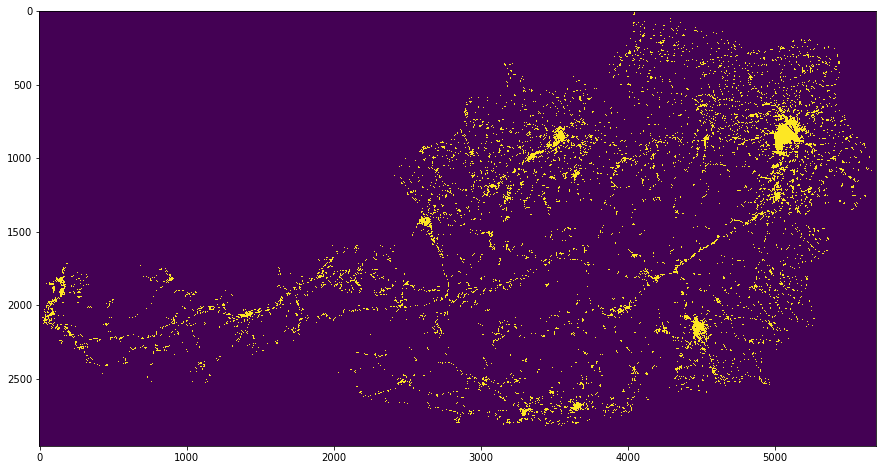

In [17]:
mask = r.mask("Artificial surfaces", encoded, legend)
plt.figure(figsize=(15,10))
plt.imshow(mask)
plt.show()

At this point the maximum value in the encoded dataset is ..

In [26]:
numpy.max(encoded)

21093827

... which allows to store the data in 32-bit depth.